# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [39]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [40]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

print data.describe()

print "--------------"

print data.head()


# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

               RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06
--------------
      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0
Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


In [41]:
# More Stats! Used to answer Question 10.
# Finding people similar to the 3 clients and getting their MEDV stats
print "\n----------------\nClient 1\n"
client1 = data[(data['RM'] < 6) & (data['RM'] > 4) & (data['LSTAT'] < 19) & (data['LSTAT'] > 15) & (data['PTRATIO'] < 17) & (data['PTRATIO'] > 13)]
print client1.head()
print client1.describe()
print "\n----------------\nClient 2\n"
client2 = data[(data['RM'] < 5) & (data['RM'] > 3) & (data['LSTAT'] < 34) & (data['LSTAT'] > 30) & (data['PTRATIO'] < 24) & (data['PTRATIO'] > 20)]
print client2.head()
print client2.describe()
print "\n----------------\nClient 3\n"
client3 = data[(data['RM'] < 10) & (data['RM'] > 7) & (data['LSTAT'] < 5) & (data['LSTAT'] > 1) & (data['PTRATIO'] < 14) & (data['PTRATIO'] > 10)]
print client3.head()
print client3.describe()


----------------
Client 1

        RM  LSTAT  PTRATIO      MEDV
12   5.889  15.71     15.2  455700.0
146  5.628  16.65     14.7  327600.0
153  5.709  15.79     14.7  407400.0
156  5.272  16.14     14.7  275100.0
211  5.951  17.92     16.4  451500.0
             RM      LSTAT    PTRATIO           MEDV
count  6.000000   6.000000   6.000000       6.000000
mean   5.706500  16.341667  15.283333  390600.000000
std    0.242906   0.846390   0.746771   73229.502251
min    5.272000  15.710000  14.700000  275100.000000
25%    5.648250  15.802500  14.700000  347550.000000
50%    5.749500  15.990000  14.950000  416850.000000
75%    5.864250  16.522500  15.800000  445200.000000
max    5.951000  17.920000  16.400000  455700.000000

----------------
Client 2

        RM  LSTAT  PTRATIO      MEDV
367  4.368  30.63     20.2  184800.0
371  4.880  30.62     20.2  214200.0
             RM      LSTAT  PTRATIO           MEDV
count  2.000000   2.000000      2.0       2.000000
mean   4.624000  30.625000     2

### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **
- **RM**: The number of rooms would be directly proprtional to the MEDV for the house as more rooms generally means bigger size of property/more floors and thus more room for the families. People will pay more for houses with more rooms. So an **increase in RM would result in an increase in MEDV**.
- **LSTAT**: is inversely proportional to MEDV and so **an increase in LSTAT would result in a decrease in MEDV**. People in general like to live around neighbors of similar socio-economic status, a higher % of working poor homeowners would attract people who similar and thus cannot afford to pay a lot for the houses. Also, people who can afford to live there would be turned off by the prospect of living with working poor families and having their children mingle with the kids of such families.
- **PTRATIO**: is inversely proportional to MEDV, and **so an increase in PTRATIO would result in a descrease in MEDV**. People who've bought homes are generally looking to lay down roots, and start families. Buying a house near a good school is a priority for such people, and an indicator for good schools is a low student/teacher ratio, as this indicates that the school is well funded, so can afford to employ more teachers thereby guaranteeing each kid will get more individual attention in class.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [42]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

Model has a coefficient of determination, R^2, of 0.923.


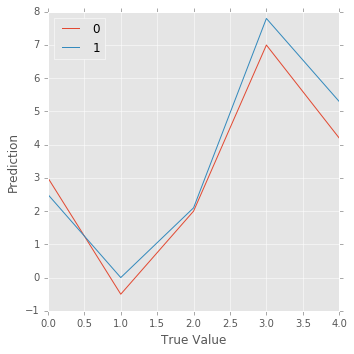

In [43]:
# Calculate the performance of this model
import matplotlib.pyplot as plt
plt.style.use('ggplot')
x = [3, -0.5, 2, 7, 4.2]
y = [2.5, 0.0, 2.1, 7.8, 5.3]
df = pd.DataFrame([x,y]).T
ax = df.plot()
ax.set_xlabel('True Value')
ax.set_ylabel('Prediction')
fig = ax.figure
fig.set_size_inches(5,5)
fig.tight_layout(pad=1)
fig.savefig('afile.png', dpi=125)

score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

**Answer:**
R^2 explains the % of the variability in labels that can be explained by the variability in features, as understood by our model. In other words, how much of the differences in the labels can be explained by our model.

The values of R^2 range between -1 and 1, with 1 being the most optimal score and 0 being a constant model that predicts the same values, regardless of the input features provided. We can see that this model has scored 0.923 which means 92.3% of the variability in labels can be successfully explained by what our model has learned about the features of our dataset.

Therefore, I would say that the model has captured the variability of the target variable successfully (provided success is defined as a score > 0.9, which seems reasonable).

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [44]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=24)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **
Splitting into training and test data allows us to test the accuracy of our model and see how well it generalizes to data it has not seen before (i.e. the test set). How our model performs on the test set also lets us address issues with overfitting/underfitting, and the make the needed variance/bias trade offs.

If the model performs well on the test set as well as training set, we know it has formed a mental model of underlying data that is complex enough to capture the patterns in the data, but also simple enough to generalize to new data. Once it passes this test, we can commit to using it in the real world with some confidence.

If we don't test our model on a test set, it might overfit to our training set, which might be radically different from real world data, rendering the model that performed exceptionally well during training unusable with any other real world data.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

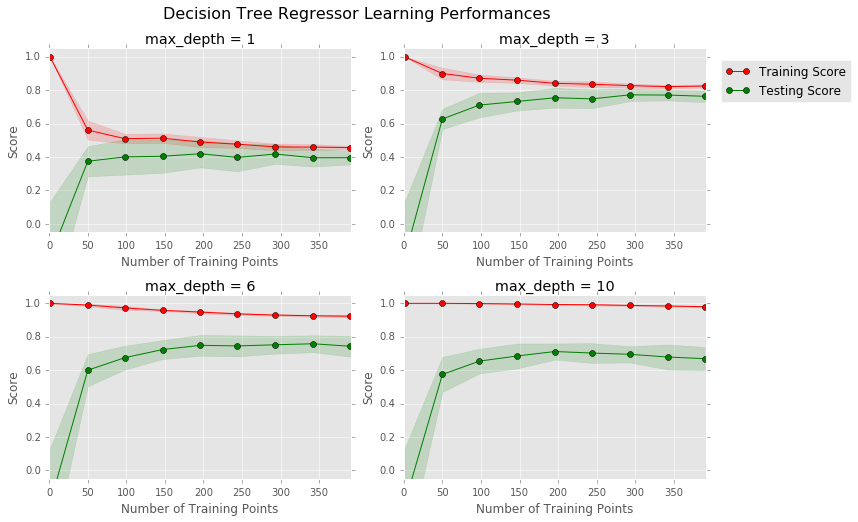

In [45]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **
**Max-Depth 1:**
The bias here is very high, and the model is not complex enough to understand the underlying patterns in the data. We see this by observing the sharp decrease in the training data scores as more training data is added. This means the model is able to explain a lesser % of the variability of labels with the addition of more data, proving that it doesn't actually understand the patterns of the underlying data. Similarly, the scores for test data initially improve with an addition of more data points, as observed in the graph, but then we reach a point where the addition of more data stops improving the r^2 score.
At this point, the training and test r^2 scores both plateau and converge to a very low value of 0.4 which means only 0.4 of the variability of the labels can be explain by the model's understanding of the features in the dataset. That is unacceptably low and doesn't improve much even with the addition of more training points because the model simply doesn't have an acceptable understanding of the patterns in the underlying data.
Increasing the # of features will help increase the r^2 score in this case!

**Max-Depth 10:**
Deeper trees will generally lead to overfitting on the training set and high variance, thus the training r^2 score is way higher than the test r^2 score. Infact as we can see, the training score is approaching 1 consistently for all sample sizes, which means almost all of the variability of the labels is being explained by our model's undertsanding of the dataset's features. That kind of score is unheard of and can only be achieved by overfitting! We can further see this because the same model can explain between 60-75% of the variability of labels in the training set, proving that the patterns it has learned in the underlying data don't generalize beyond training data.
Reducing the number of features would increase the R^2 score of the model. Furthermore, adding more data points, will not help in this case as we can see the r^2 score remains pretty consistently between 0.7 - 0.8 even with the addition of more datapoints, and the r^2 score gains are very small to justify the process of collecting more data points. Infact the curve even starts to diverge past ~350 data points, and adding more data points actually leads to a worse performance! Therefore adding more datapoints would not benefit the model!

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

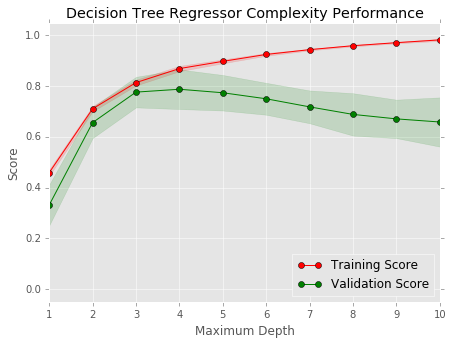

In [46]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **
At max-depth of 1, we see high bias due to underfitting, our model is not sophisticated enough to understand the patterns in the training or the test data, performing equally badly at both. Only 30 - 45% of the variability of the labels is explained by our model.

At a max-depth of 10, we see high variance as a result of overfitting. The r^2 score for the training graph is way higher than the r^2 score for the test graph. The training score is approaching 1 at a max-depth of 10, so our model is able to explain ~100% of the variability of the labels in the training set, but only < 70% of the variablitiy in the test set. This stark difference and the fact that the patterns learned by our model don't generalize to the test data are a clear sign of high variance.

Both of the aforementioned conclusions can be observed visually in the graph -- the r^2 scores for the training data start out at an unacceptably low score of between 0.3-0.45 for both training and test data indicating that our model has no understanding of the patterns of the underlying dataset due to high bias. From there on out, the scores for the training data increase consistently as the model increasingly overfits itself to the training dataset, while the scores for the test dataset take a fall with the addition of complexity after a max-depth of 3 or 4, and the model slowly becomes suboptimal for any other dataset than the training dataset. Finally at a max-depth of 10, while the model is performing admirably for our training data at close to 1.0, it is not generalizing to our test data scoring < 0.7, a result of high variance.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

At a max-depth of 3, our model maximizes its collective performance on both the training and test datasets. It scores a ~0.8 which isn't very bad and means the model was able to reduce its bias and learn a lot of the complex patterns of the underlying dataset. But more importantly it scores at 0.8 on both the training and testing datasets which means it didn't overfit itself to the training set and exibits low variance up to this point.

The general intuition that led me to this answer was 2 part. Find a point that:
- maximizes both the training and testing scores.
- minimizes the difference between both the training and testing scores.

A max-depth of 3 fit both these criteria.



-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **
GridSearch lets us apply multiple combinations of parameters to tune our algorithm to figure out which combination of parameters gives us the best performance. In doing so it takes the guessing game out of the algorithm optimization processs and allows us to meticulously iterate through all the parameters we want to test, without wasting human time. Once its done iterating through all possible combinations of the parameters for things like kernel, C etc. we can be quite sure we picked the most optimized version of our algorithm, given our choice of parameters.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **
The k-fold cross validation breaks our dataset into k bins. Then it picks each bin in turn as our test set, with the other k-1 bins serving as our training data set. It then averages all the test scores to generate the final score. Thus we use all our data for both training and testing.
Without cross validation, we wouldn't have enough data in training/test sets to be able to run tests for all parameters and truly compare the scores resulting from using the different combinations of these paramaters.
If we can both break our training/test sets into multiple buckets to run more tests with more data and also be able to choose different parameters to run these tests with, we can get to the most optimal fit for our model.
Cross validation allows us to run more tests and prevents overfitting by not giving preference to algorithms that tend to overfit and thus perform better on training sets without actually generalizing to test sets.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [47]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    n = X.shape[0]
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n, n_iter=10, test_size=0.2, random_state=24)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=48)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

print "done!"

done!


### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [48]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)


# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **
4

I had picked 3 as the optimal max_depth. But looking back, it makes sense to pick 4 because it offers a slightly better performance on the test and training sets. I was thrown off because I was more focussed on minimizing the difference between the 2 predictions.

But going back to the 2 criteria I set out in my original reasoning:
- maximizing both the training and testing scores.
- minimizing the difference between both the training and testing scores.

a max-depth of 4 better serves the 1st requirement.

I would need to assign appropriate weights to both the criteria above by looking at more examples of training/test r^2 scores, so I can make a more informed decision about which one to prioritize intuitively the next time!

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [49]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $412,324.14
Predicted selling price for Client 2's home: $234,546.67
Predicted selling price for Client 3's home: $914,025.00


**Answer: **

- Client 1: $412,324.14

- Client 2: $234,546.67

- Client 3: $914,025.00


I did some analysis for homes in the dataset with similar features to the 3 clients above and came across some interesting results!

----------------

**Client 1**
- Features: 5 rooms | LSTAT 17 | PT 15
- Sell at (according to model): $412,324.14
- 1 > σ away from mean 

- Avg Price given features: $390,600
  - RM | LSTAT | PTRATIO | MEDV
  - 5.706500 | 16.341667 | 15.283333 | 390600.000000

Looking at the avg price and feature values alone, our first instinct would be to price the home lower.

But if we actually look at the individual houses similar to Client 1, we see that prices are all over the place. Record #211 has 5.95 bedrooms, but higher (worse) LSTAT and PTRATIOs, yet they're priced at $451,500 - which is more than the predicted value of Client 1's home. Whereas, #156 who has a similar house with 5.27 bedrooms, a lower (better) LSTAT and PTRATIO than #211 is priced at 275,100 - 60% of the house price of #211! Clearly our model is missing some features that are relevant to predicting the prices of the houses and these features might account for this discrepancy between #211 and #156 (most likely the location of the houses).

- INDEX |  RM  |  LSTAT  |  PTRATIO    |    MEDV
- 12   |  5.889  |  15.71    |   15.2  |  455700.0
- 146  |  5.628  |  16.65    |   14.7  |  327600.0
- 153  |  5.709  |  15.79    |   14.7  |  407400.0
- 156  |  5.272  |  16.14    |   14.7  |  275100.0
- 211  |  5.951  |  17.92    |   16.4  |  451500.0

Yet if I had to make a call, given only the data I have, I would recommend they either stay at the current price or raise it very slightly to remain broadly comparable to other houses like them ( #211, #153, #12).

At this point, I would also explore the missing features to account for the pricing discrepancy and make our model better.


----------------
**Client 2**
- Features: 4 rooms | LSTAT 32 | PT 22
- Sell at (according to model): $234,546.67
- 1 < σ < 2 away from mean

- Avg Price given features: $199,500
  - RM | LSTAT | PTRATIO | MEDV
  - 4.624000 | 30.625000 | 20.2 | 199500.000000

The mean of other comparable houses with 4 rooms and lower (better) LSTAT and PTRATIOS is 199,500 with both of them pricing their houses at 184,800 and 214,200 respectively. To stay competitive in the market, I would suggest my client price their home lower. (This once again doesn't taken location, or any other factors our model might be missing, into account.)

- INDEX  | RM   |  | LSTAT   | PTRATIO      |  MEDV
- 367  |  4.368  |  30.63   |    20.2  |  184800.0
- 371  |  4.880  |  30.62   |    20.2  |  214200.0




----------------
**Client 3**
- Features: 8 rooms | LSTAT 3 | PT 12
- Sell at (according to model): $914,025.00
- 3 < σ away from mean

- Avg Price given features: $806,400
  - RM | LSTAT | PTRATIO | MEDV
  - 7.378500 | 3.620000 | 12.800000 | 806400.00000

The mean of the 2 other houses with similar features is $806,400.

But both the houses in our sample of comparable houses have only 7 bedrooms, and higher (worse) LSTAT and PTRATIO than the client's house. Furthermore, one of them is priced at $913,500, while being of a worse quality across the 3 features measured. Location and other unaccounted for features notwithstanding, I would recommend the client raise their price slightly.

- INDEX  | RM  |  LSTAT  |  PTRATIO    |    MEDV
- 190  |  7.287  |   4.08    |   12.6  699,300.0
- 258  |  7.470  |   3.16    |   13.0  913,500.0



### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

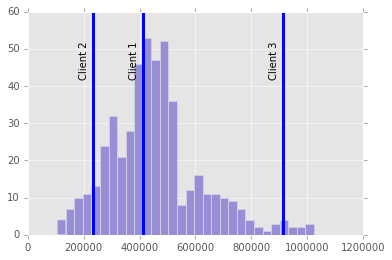

In [50]:
import matplotlib.pyplot as plt
for i,price in enumerate(reg.predict(client_data)):
    plt.hist(prices, bins = 30)
    plt.axvline(price, lw = 3)
    plt.text(price-50000, 50, 'Client '+str(i+1), rotation=90)

In [51]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $29,438.89


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **
The model has been trained on Boston homes so would most likely only translate to cities that are like Boston. Perhaps we could build another model to map all major cities and their attributes and create clusters of cities that are similar. We could then train models for all major clusters and these models could be easily used in all cities in that cluster.

Without such an algorithm, a model for pricing homes in Boston suburbs would not translate to West Lafayette, Indiana or Napa Valley, or even to other coast cities like NYC or SF which have vastly different housing markets!

Furthermore, housing data collected in 1978 (even it has been adjusted for 35 years of inflation) would not be a good predictor for home prices in 2017. The "hipness" of neighborhoods changes over decades as does the landscape of the city, the job availablity and the desire to live in a particular city. All of these factors would render a housing model formed in 1978 not as useful in 2017!

The model seems to predict prices in a range of $29,438.89 which is ~7 percent of the value it is predicting for the houses. That means our clients could loose or gain ~7 percent of the value of their homes if they priced them by listening to our model's advice. That is a huge number, and moreover it is unfair to all our clients due to its lack of consistency in pricing comparable properties. We would ideally want a model that is more realiable and consistent in its predictions.

Finally, the model definitely lacks enough features. As we saw in the last answer, the home of #156 who has a house with 5.27 bedrooms, a lower (better) LSTAT and PTRATIO than #211's house is priced at 275,100 which is 60% of the house price of #211. Location, # of bathrooms, # floors, sq footage, year built are some of the features I can think of that would affect the price of the house and might account for this discrepancy present in the way our model prices houses.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.